<a href="https://colab.research.google.com/github/jannat226/pytorch-deep-learning/blob/main/03_Pytorch_ComputerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
#PyTorch Computer Vision

In [95]:
#Computer vision libraries

torchvision.datasets - get datasetsand data loading function for computer vision

torchvision.models - get pretrained computer vision models
torchvision.transforms - functions for manipulating your vision data (images) to be suitable for ML model
torch.utils.Data.Dataset - Base dataset class
torch.utils.data.DataLoader - Create a Python over a dataset

In [96]:
import torch
from torch import nn
#torchvision
import torchvision
from torchvision import transforms
from torchvision import datasets
from torchvision.transforms import ToTensor
#import matplotlib for visualization
import matplotlib.pyplot as plt

#check versions
print(torch.__version__)
print(torchvision.__version__)

2.6.0+cu124
0.21.0+cu124


##Getting a dataset
The dataset we are going to use is data MNIST

In [97]:
#MNIST STANDS FROM Modified National Institute of Standard and Technology -> sample images of handwritten digits
#using fashion MNIST
#downloading inbuilt datasets

##Setting up training data


In [98]:
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root = "data", #where to download the data to?
    train = True,#do we want the training datasets
    download = True,
    transform = torchvision.transforms.ToTensor(), #how do we want to transform the data
    target_transform=None#how do we  want to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = torchvision.transforms.ToTensor(),
    target_transform = None
)

In [99]:
len(train_data), len(test_data)

(60000, 10000)

In [100]:
#see the first training examples
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [101]:
#transforms to tensor
class_name = train_data.classes
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [102]:
class_idx = train_data.class_to_idx
class_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [103]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [104]:
#check the shape
image.shape, label

(torch.Size([1, 28, 28]), 9)

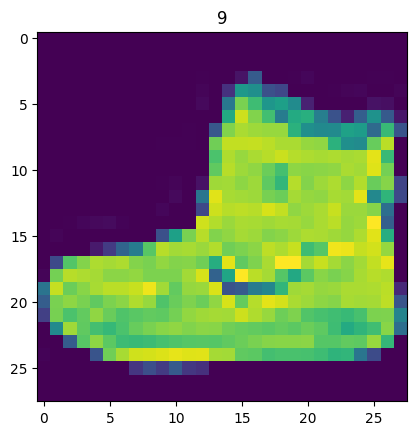

In [105]:
#Visualizing our data
import matplotlib.pyplot as plt
image,label = train_data[0]
image,label
image.shape
plt.imshow(image.squeeze())
plt.title(label);


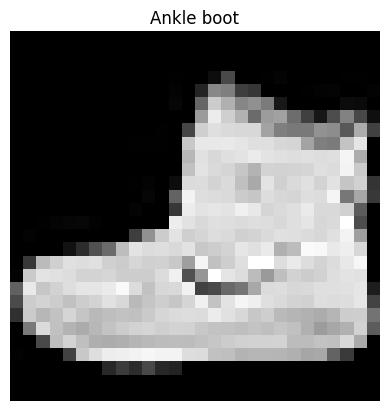

In [106]:
plt.imshow(image.squeeze(), cmap= 'grey')

plt.title(class_name[label]);
plt.axis('off');

#plot more images


23380
17181
20595
47155
49926
41288
10727
42490
28556
59437
5739
1543
15732
39541
23633
19311


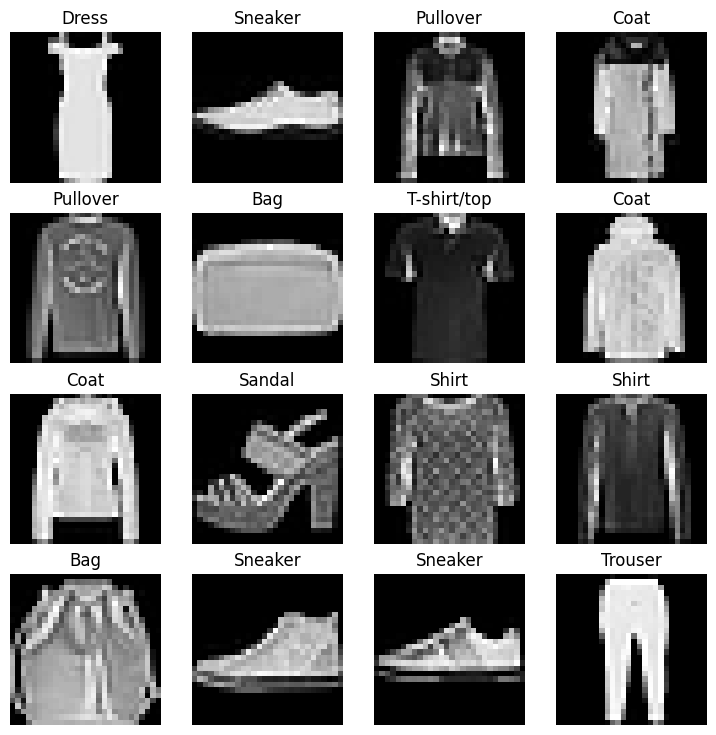

In [107]:
# torch.manual_seed(42)
fig = plt.figure(figsize = (9,9))
rows,cols = 4,4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0,len(train_data),size = [1]).item()
  print(random_idx)
  img, label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap = "gray")
  plt.title(class_name[label])
  plt.axis(False)

In [108]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch?
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7da3c08fcfd0>, <torch.utils.data.dataloader.DataLoader object at 0x7da3c0b2c090>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


##Model 0:Build a baseline model
Whent starting to build a series of ML modelling experiment,it's best practice to start with a baseline model.
A baseline model is a simple model you will try and improve upon subsequent models/experiments.

Start simply and add complexity  when necessary.

In [109]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [110]:
#Create a flatten layer
flatten_model = nn.Flatten()
#get a simple sample
x = train_features_batch[0]
x

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0275, 0.2392, 0.4588, 0.5020, 0.3882, 0.4549, 0.5451, 0.6157,
          0.8510, 0.8824, 0.7020, 0.5294, 0.1490, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6235,
          0.7333, 0.7686, 0.7647, 0.7686, 0.8784, 0.8431, 0.5608, 1.0000,
          0.9176, 0.7725, 0.7412, 0.7882, 0.7765, 0.6627, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.4745, 0.8000,
          0.7294, 0.7255, 0.7333, 0.7216, 0.7059, 0.6902, 0.4471, 0.7608,
          0.6941, 0.6902, 0.7569, 0.7333, 0.7176, 0.8078, 0.4863, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6157, 0.7451,
          0.7176, 0.7216, 0.7216, 0.7333, 0.7333, 0.7529, 0.8039, 0.7255,
          0.7255, 0.7333, 0.7255, 0.7333, 0.7255, 0.7451,

Image size: torch.Size([1, 28, 28])
Label: 3, label size: torch.Size([])


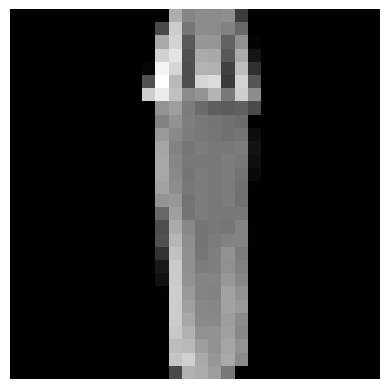

In [111]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
# plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [112]:
# Create a flatten layer
flatten_model = nn.Flatten() # all nn modules function as a model (can do a forward pass)

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

# Try uncommenting below and see what happens
#print(x)
#print(output)

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [113]:
#Create flatten layer
flatten_model = nn.Flatten()

In [114]:
#Get a single sample
x = train_features_batch[0]#color channel height

In [115]:
#Flatten the sample
output = flatten_model(x)
#Print out what happened
print(f"Shape before flattening :{x.shape}\n shape after flattening {output.shape}")#color_channel_height

Shape before flattening :torch.Size([1, 28, 28])
 shape after flattening torch.Size([1, 784])


In [116]:
output.squeeze()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0275,
        0.2392, 0.4588, 0.5020, 0.3882, 0.4549, 0.5451, 0.6157, 0.8510, 0.8824,
        0.7020, 0.5294, 0.1490, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6235,
        0.7333, 0.7686, 0.7647, 0.7686, 0.8784, 0.8431, 0.5608, 1.0000, 0.9176,
        0.7725, 0.7412, 0.7882, 0.7765, 0.6627, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.4745,
        0.8000, 0.7294, 0.7255, 0.7333, 0.7216, 0.7059, 0.6902, 0.4471, 0.7608,
        0.6941, 0.6902, 0.7569, 0.7333, 0.7176, 0.8078, 0.4863, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.6157, 0.7451, 0.7176, 0.7216, 0.7216, 0.7333, 0.7333, 0.7529, 0.8039,
        0.7255, 0.7255, 0.7333, 0.7255, 0.7333, 0.7255, 0.7451, 0.6549, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [117]:
from torch import nn
class FashionMNISTNet(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= input_shape, out_features=hidden_units),
        nn.Linear(in_features= hidden_units, out_features=output_shape)
    )
  def forward(self,x):
    return self.layer_stack(x)

In [118]:
torch.manual_seed(42)
#setup model with input parameters
model_0 = FashionMNISTNet(input_shape = 28*28,#this is 28*28
                          hidden_units=10,#how many units in hidden layer
                          output_shape=len(class_name)
                          ).to("cpu")
model_0#baseline model

FashionMNISTNet(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [119]:
dummy_X = torch.rand([1,1,28,28])
model_0(dummy_X)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [120]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

##3.2 Setup loss,optimizer and evaluation metrics


  *Loss function = since we're working with multi-class data,loss   function will be
    nn.CrossEntropyLoss
*  Optimizer = our optimizer `torch.optim.SGD()`(stochastic gradient descent)
*  Evaluation metric = since we are working on a classification problem,let's use accuracy as a evaluation matrix



In [121]:
import requests

url = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py"
response = requests.get(url)

with open("helper_functions.py", "wb") as f:
    f.write(response.content)


In [122]:
# from helper_functions import accuracy_fn
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc


In [123]:
#Set loss function and optimizer
loss_fun = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),lr = 0.1)

In [124]:
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc


##fUNCTION TO time our experiment
Machine learning is very experimental
Two main thing we will do


*   Model Performance
*   How fast it runs



In [125]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

#Creating training loop and training a model on batches of data
1.Loop through epochs
2.Loop through training_batches, perform training steps, calculate the train loss
*per batch*
3.Loop through testing_batches, perform testing steps, claculate the test loss
*per batch*

1.   Loop through epochs
2.   Loop through training_batches, perform training steps, calculate the train loss
*per batch*
3.   Loop through testing_batches, perform testing steps, claculate the test loss
*per batch*
4.   Print out what happens
5. Time it all(for fun)


In [126]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

#set the epochs = 3
epochs = 3

#setting the training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n-----")
  ###Trainig
  train_loss = 0
  #Add a loop to loop through the training batches
  for batch,(X,y) in enumerate(train_dataloader):#X is image and y is label
    model_0.train()
    #1.forward pass
    y_pred = model_0(X)

    #2.Calculate loss (per batch)
    loss = loss_fun(y_pred,y)
    train_loss += loss #accumulate train loss

    #3.Optimizer zero grad
    optimizer.zero_grad()

    #4. Loss backward
    loss.backward()

    #5. Optimizer step
    optimizer.step()

    #Print out what's happening
    if batch % 400 == 0:
      print(f"Looked at {batch* len(X)}/{len(train_dataloader.dataset)}samples.")
  #Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  ###Testing
  test_loss, test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      #1 fForward  pass
      test_pred = model_0(X_test)

      #2. Calculate loss(accumulatively)
      test_loss += loss_fun(test_pred, y_test)

      #3. Calculate accuracy
      test_acc += accuracy_fn(y_true= y_test, y_pred = test_pred.argmax(dim=1))

    #Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    #Calculate the test acc average per batch
    test_acc /= len(test_dataloader)

  #Print out what's happening
  print(f"\nTrain loss:{train_loss:.4f} | Test loss:{test_loss: .4f}, Test acc:{test_acc:.4f}")

#Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start= train_time_start_on_cpu, end = train_time_end_on_cpu, device = str(next(model_0.parameters())))



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
-----
Looked at 0/60000samples.
Looked at 12800/60000samples.
Looked at 25600/60000samples.
Looked at 38400/60000samples.
Looked at 51200/60000samples.

Train loss:0.5904 | Test loss: 0.5095, Test acc:82.0387
Epoch:1
-----
Looked at 0/60000samples.
Looked at 12800/60000samples.
Looked at 25600/60000samples.
Looked at 38400/60000samples.
Looked at 51200/60000samples.

Train loss:0.4763 | Test loss: 0.4799, Test acc:83.1969
Epoch:2
-----
Looked at 0/60000samples.
Looked at 12800/60000samples.
Looked at 25600/60000samples.
Looked at 38400/60000samples.
Looked at 51200/60000samples.

Train loss:0.4550 | Test loss: 0.4766, Test acc:83.4265
Train time on Parameter containing:
tensor([[ 0.0273,  0.0298, -0.0065,  ...,  0.0071,  0.0091,  0.0170],
        [-0.0189, -0.0355,  0.0155,  ...,  0.0161,  0.0120,  0.0117],
        [-0.0008,  0.0020,  0.0032,  ...,  0.0058, -0.0146,  0.0084],
        ...,
        [-0.0116,  0.0274, -0.0323,  ...,  0.0527,  0.0434,  0.0006],
        [-0.0231,  0

In [127]:
next(model_0.parameters())#gets the first parameter (like a weight or bias tensor) from your model.

Parameter containing:
tensor([[ 0.0273,  0.0298, -0.0065,  ...,  0.0071,  0.0091,  0.0170],
        [-0.0189, -0.0355,  0.0155,  ...,  0.0161,  0.0120,  0.0117],
        [-0.0008,  0.0020,  0.0032,  ...,  0.0058, -0.0146,  0.0084],
        ...,
        [-0.0116,  0.0274, -0.0323,  ...,  0.0527,  0.0434,  0.0006],
        [-0.0231,  0.0252,  0.0236,  ..., -0.0892, -0.0385, -0.0071],
        [ 0.0175, -0.0148,  0.0027,  ..., -0.1155, -0.0674,  0.0125]],
       requires_grad=True)

##Make predictions and get Model 0 results

In [128]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary containing the results of model predictiing on Data Loader."""
  loss, acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      #Make predictions
      y_pred = model(X)
      #Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim=1))
    #Scale loss and acc to find the average loss/ acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)
  return{"model_name": model.__class__.__name__,#only works when model was created with
         "model_loss": loss.item(),
         "model_acc" : acc}


#Calculate model 0 results on test dataset
model_0_results = eval_model(model= model_0, data_loader = test_dataloader, loss_fn = loss_fun, accuracy_fn = accuracy_fn)
model_0_results

{'model_name': 'FashionMNISTNet',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [129]:
###Set up device agnostic-code(for using gpu)
!nvidia-smi

Sun Apr  6 00:13:43 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P0             26W /   70W |     104MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [130]:
torch.cuda.is_available()

True

In [131]:
#Set up device agnoistic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [132]:
#Creating a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape:int,hidden_units:int,output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = input_shape,
                      out_features = hidden_units),
            nn.ReLU(),
            nn.Linear(in_features = hidden_units,
                      out_features = output_shape),
        nn.ReLU()
        )
    def forward(self,x:torch.Tensor):
      return self.layer_stack(x)


In [133]:
next(model_0.parameters()).device

device(type='cpu')

In [134]:
device

'cuda'

In [135]:
#instance of model_1
model_1 = FashionMNISTModelV1(input_shape = 784,#this is the output of the flatten after our 28*28
                    hidden_units = 10,
                    output_shape = len(class_name))#sent to gpu if available


In [136]:
#Loss function
#Set loss function and optimizer
loss_fun = nn.CrossEntropyLoss() #measure how wrong our nodel is
optimizer = torch.optim.SGD(params = model_1.parameters(),lr = 0.1)#tries to update our model's parameters to reduce the loss

In [137]:
##Build a training loop
def train_step(model : torch.nn.Module, data_loader :torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  train_loss , train_acc =0,0

  #put model into trainig mode
  model_0.train()

  #Add a loop to loop through the training batches
  for batch,(X,y) in enumerate(data_loader):#X is image and y is label
    #Put data on target device
    X,y = X.to(device),y.to(device)

    #1.forward pass (outputs the raw logits from the model)
    y_pred = model(X)

    #2.Calculate loss (per batch)
    loss = loss_fun(y_pred,y)
    train_loss += loss #accumulate train loss
    train_acc += accuracy_fn(y_true= y, y_pred = y_pred.argmax(dim=1)) #go from logits -> prediction labels

    #3.Optimizer zero grad
    optimizer.zero_grad()

    #4. Loss backward
    loss.backward()

    #5. Optimizer step
    optimizer.step()

    #Print out what's happening
    if batch % 400 == 0:
      print(f"Looked at {batch* len(X)}/{len(train_dataloader.dataset)}samples.")
  #Divide total train loss  and accurcay by length of train dataloader
  train_loss /= len(train_dataloader)
  train_acc /= len(data_loader)

  print(f"Train loss:{ train_loss: .5f} | Train acc:{train_acc :.2f}%")



In [138]:
def test_step(model: torch.nn.Module, data_loader : torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  #Put the model in eval mode
  model.eval()

  #Turn on inference mode context manager
  with torch.inference_mode():
    for X,y in data_loader:
      #Send the data to the target device
      X,y = X.to(device), y.to(device)

      #1.Forward pass
      test_pred = model(X)

      #2.Calculate the loss/accuracy
      test_loss += loss_fn(test_pred,y)
      test_acc += accuracy(y_true = y, y_pred = test_pred.argmax(dim=1))#go from logits to prediction labels

    #Adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc/= len(data_loader)
    print(f"Test loss:{ test_loss: .5f} | Test acc:{test_acc:.2f}%\n")


In [139]:

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_1,
        loss_fn=loss_fun,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fun,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

In [ ]:
# Get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results